# 3rd Oct

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-10-03', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@melos_studio Good project @liton77728\n@MdMas...
1,How to use social media automation to make 50$...
2,@airdropinspect great project\n#Airdrop #Airdr...
3,Good project @liton77728\n@MdMasumSarder11\n@M...
4,Australian Football League Secures $25M Deal W...
5,Meta portrait\nlink in bio\nfloor price 0.001\...
6,@binance #bluesparrow season is coming soon\n\...
7,@OfficialTravlad @BillyM2k 🟢🟢🟢Green is the onl...
8,Predict the price of #Bitcoin &amp; win BTC pr...
9,Bitcoin Price (USD): 42885.18 \nEthereum Price...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@melos_studio Good project @liton77728\n@MdMas...,@melos_studio Good project @liton77728@MdMasum...
1,How to use social media automation to make 50$...,How to use social media automation to make 50$...
2,@airdropinspect great project\n#Airdrop #Airdr...,@airdropinspect great project Bitcoin
3,Good project @liton77728\n@MdMasumSarder11\n@M...,Good project @liton77728@MdMasumSarder11@MDMas...
4,Australian Football League Secures $25M Deal W...,Australian Football League Secures $25M Deal W...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@melos_studio Good project @liton77728\n@MdMas...,@melos_studio Good project @liton77728@MdMasum...,0.600000,0.700000
1,How to use social media automation to make 50$...,How to use social media automation to make 50$...,0.066667,0.033333
2,@airdropinspect great project\n#Airdrop #Airdr...,@airdropinspect great project Bitcoin,0.750000,0.800000
3,Good project @liton77728\n@MdMasumSarder11\n@M...,Good project @liton77728@MdMasumSarder11@MDMas...,0.600000,0.700000
4,Australian Football League Secures $25M Deal W...,Australian Football League Secures $25M Deal W...,0.000000,0.000000
5,Meta portrait\nlink in bio\nfloor price 0.001\...,Meta portraitlink in biofloor price 0.001 ...,0.000000,0.000000
6,@binance #bluesparrow season is coming soon\n\...,@binance season is coming soon is the blue 💎💎...,0.100000,0.000000
7,@OfficialTravlad @BillyM2k 🟢🟢🟢Green is the onl...,@OfficialTravlad @BillyM2k 🟢🟢🟢Green is the onl...,1.000000,0.000000
8,Predict the price of #Bitcoin &amp; win BTC pr...,Predict the price of Bitcoin &amp; win BTC pri...,0.683333,0.850000
9,Bitcoin Price (USD): 42885.18 \nEthereum Price...,Bitcoin Price (USD): 42885.18 Ethereum Price (...,0.000000,0.000000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@melos_studio Good project @liton77728\n@MdMas...,@melos_studio Good project @liton77728@MdMasum...,0.600000,0.700000,Positive
1,How to use social media automation to make 50$...,How to use social media automation to make 50$...,0.066667,0.033333,Positive
2,@airdropinspect great project\n#Airdrop #Airdr...,@airdropinspect great project Bitcoin,0.750000,0.800000,Positive
3,Good project @liton77728\n@MdMasumSarder11\n@M...,Good project @liton77728@MdMasumSarder11@MDMas...,0.600000,0.700000,Positive
4,Australian Football League Secures $25M Deal W...,Australian Football League Secures $25M Deal W...,0.000000,0.000000,Neutral
5,Meta portrait\nlink in bio\nfloor price 0.001\...,Meta portraitlink in biofloor price 0.001 ...,0.000000,0.000000,Neutral
6,@binance #bluesparrow season is coming soon\n\...,@binance season is coming soon is the blue 💎💎...,0.100000,0.000000,Neutral
7,@OfficialTravlad @BillyM2k 🟢🟢🟢Green is the onl...,@OfficialTravlad @BillyM2k 🟢🟢🟢Green is the onl...,1.000000,0.000000,Neutral
8,Predict the price of #Bitcoin &amp; win BTC pr...,Predict the price of Bitcoin &amp; win BTC pri...,0.683333,0.850000,Positive
9,Bitcoin Price (USD): 42885.18 \nEthereum Price...,Bitcoin Price (USD): 42885.18 Ethereum Price (...,0.000000,0.000000,Neutral


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


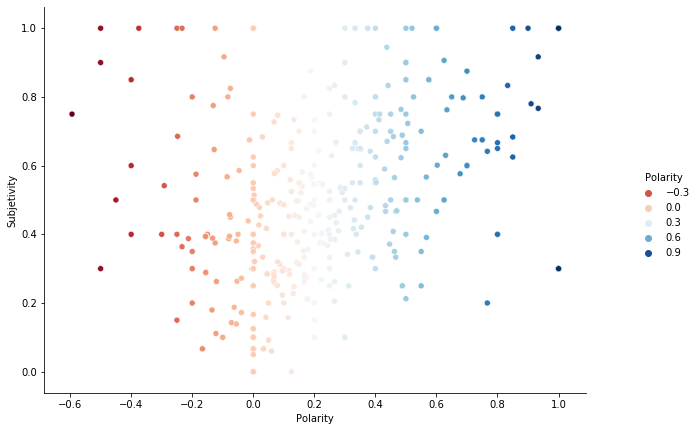

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

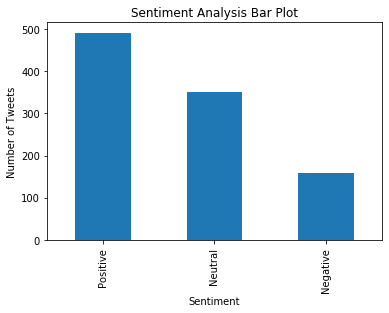

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    491
Neutral     351
Negative    158
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[491, 351, 158]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[491, 351, 158]

In [17]:
dfs = pd.read_csv("r_sentiments.csv")
  
# updating the column value/data
dfs.loc[5, 'Sentiment'] = 'day 6'
dfs.loc[5, 'Positive'] = lst_df[0]
dfs.loc[5, 'Neutral'] = lst_df[1]
dfs.loc[5, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("r_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     494.0    372.0     134.0
1     day 2     494.0    388.0     118.0
2     day 3     487.0    416.0      97.0
3     day 4     495.0    422.0      83.0
4     day 5     492.0    360.0     148.0
5     day 6     491.0    351.0     158.0
